In [ ]:
import gymnasium as gym
from twsbr_env.envs import TwsbrEnv
import torch.nn as nn
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.callbacks import CheckpointCallback

# ================================
# Pelatihan dengan Vectorized Environment
# ================================

# Buat environment vectorized LunarLander3DEnv-v0 (dengan 12 environment paralel)
env_train = make_vec_env("TwsbrEnv-v0", n_envs=8, vec_env_cls=DummyVecEnv)

# Definisikan hyperparameter PPO secara lengkap
ppo_params = {
    "learning_rate": 3e-3,      # Kecepatan pembelajaran
    "n_steps": 1000,            # Jumlah langkah per update
    "batch_size": 1000 * 8,     # Ukuran batch untuk update
    "n_epochs": 10,             # Jumlah epoch per update
    "gamma": 0.99,              # Discount factor
    "gae_lambda": 0.95,         # Faktor lambda untuk Generalized Advantage Estimation
    "clip_range": 0.2,          # Batas clipping untuk policy update
    "target_kl": 0.01,          # Target KL divergence untuk policy update
    "ent_coef": 0.01,           # Koefisien entropy bonus
    "vf_coef": 0.5,             # Koefisien untuk loss value function
    "max_grad_norm": 0.5,       # Maksimum norm untuk gradient clipping
    "use_sde": True,            # Stochastic differential equations untuk eksplorasi
    "sde_sample_freq": 32,      # Frekuensi sampling untuk SDE (-1 berarti tidak digunakan)
}

policy_kwargs = {
    "net_arch": [256, 256],     # Jaringan saraf dengan 2 layer masing-masing 256 unit
}

# Buat model PPO dengan tensorboard logging
model = PPO(
    "MlpPolicy", 
    env_train, 
    device="cuda", 
    policy_kwargs=policy_kwargs,
    verbose=1, 
    tensorboard_log="./ppo_twsbr/",  # Lokasi log TensorBoard
    #**ppo_params
)

# Callback untuk menyimpan model secara berkala (setiap 100.000 timesteps)
checkpoint_callback = CheckpointCallback(
    save_freq=10000, 
    save_path='./ppo_twsbr/',
    name_prefix='ppo_twsbr'
)

# Mulai pelatihan model selama 1.000.000 timesteps dengan progress bar
model.learn(total_timesteps=1000000, progress_bar=True, callback=checkpoint_callback)

# Simpan model final
model.save("ppo_twsbr")
print("Model telah disimpan sebagai ppo_twsbr.zip")

# Tutup environment pelatihan
env_train.close()

Using cuda device


c:\Users\User\anaconda3\envs\robot_sim\lib\site-packages\stable_baselines3\common\on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


Logging to ./ppo_twsbr/PPO_27


Output()

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40.2     |
|    ep_rew_mean     | -972     |
|    success_rate    | 0        |
| time/              |          |
|    fps             | 33       |
|    iterations      | 1        |
|    time_elapsed    | 495      |
|    total_timesteps | 16384    |
---------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 34.7         |
|    ep_rew_mean          | -974         |
|    success_rate         | 0            |
| time/                   |              |
|    fps                  | 29           |
|    iterations           | 2            |
|    time_elapsed         | 1124         |
|    total_timesteps      | 32768        |
| train/                  |              |
|    approx_kl            | 0.0026388594 |
|    clip_fraction        | 0.0124       |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.83        |
|    explained_variance   | 1.87e-05     |
|    learning_rate        | 0.0003       |
|    loss                 | 6.49e+04     |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.00266     |
|    std                  | 0.998        |
|    value_loss           | 1.48e+05     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 38.7         |
|    ep_rew_mean          | -972         |
|    success_rate         | 0            |
| time/                   |              |
|    fps                  | 29           |
|    iterations           | 3            |
|    time_elapsed         | 1676         |
|    total_timesteps      | 49152        |
| train/                  |              |
|    approx_kl            | 0.0028758463 |
|    clip_fraction        | 0.0117       |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.82        |
|    explained_variance   | -4.77e-07    |
|    learning_rate        | 0.0003       |
|    loss                 | 3.7e+04      |
|    n_updates            | 20           |
|    policy_gradient_loss | -0.0028      |
|    std                  | 0.991        |
|    value_loss           | 8.72e+04     |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 45.7        |
|    ep_rew_mean          | -967        |
|    success_rate         | 0           |
| time/                   |             |
|    fps                  | 31          |
|    iterations           | 4           |
|    time_elapsed         | 2100        |
|    total_timesteps      | 65536       |
| train/                  |             |
|    approx_kl            | 0.016097149 |
|    clip_fraction        | 0.108       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.8        |
|    explained_variance   | -2.38e-07   |
|    learning_rate        | 0.0003      |
|    loss                 | 1.71e+04    |
|    n_updates            | 30          |
|    policy_gradient_loss | 0.00374     |
|    std                  | 0.985       |
|    value_loss           | 4e+04       |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 55.7         |
|    ep_rew_mean          | -940         |
|    success_rate         | 0.01         |
| time/                   |              |
|    fps                  | 34           |
|    iterations           | 5            |
|    time_elapsed         | 2383         |
|    total_timesteps      | 81920        |
| train/                  |              |
|    approx_kl            | 0.0057956795 |
|    clip_fraction        | 0.0932       |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.81        |
|    explained_variance   | -1.19e-07    |
|    learning_rate        | 0.0003       |
|    loss                 | 9.41e+03     |
|    n_updates            | 40           |
|    policy_gradient_loss | -0.00173     |
|    std                  | 0.981        |
|    value_loss           | 2.36e+04     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 68.5         |
|    ep_rew_mean          | -910         |
|    success_rate         | 0.02         |
| time/                   |              |
|    fps                  | 36           |
|    iterations           | 6            |
|    time_elapsed         | 2704         |
|    total_timesteps      | 98304        |
| train/                  |              |
|    approx_kl            | 0.0044628317 |
|    clip_fraction        | 0.0271       |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.8         |
|    explained_variance   | -0.0056      |
|    learning_rate        | 0.0003       |
|    loss                 | 1.73e+04     |
|    n_updates            | 50           |
|    policy_gradient_loss | -0.00597     |
|    std                  | 0.982        |
|    value_loss           | 1.9e+04      |
------------------------------------------


Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Mulai inferensi satu episode. Tekan Ctrl+C untuk menghentikan lebih awal.


c:\Users\User\anaconda3\envs\robot_sim\lib\site-packages\stable_baselines3\common\on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


Episode selesai.


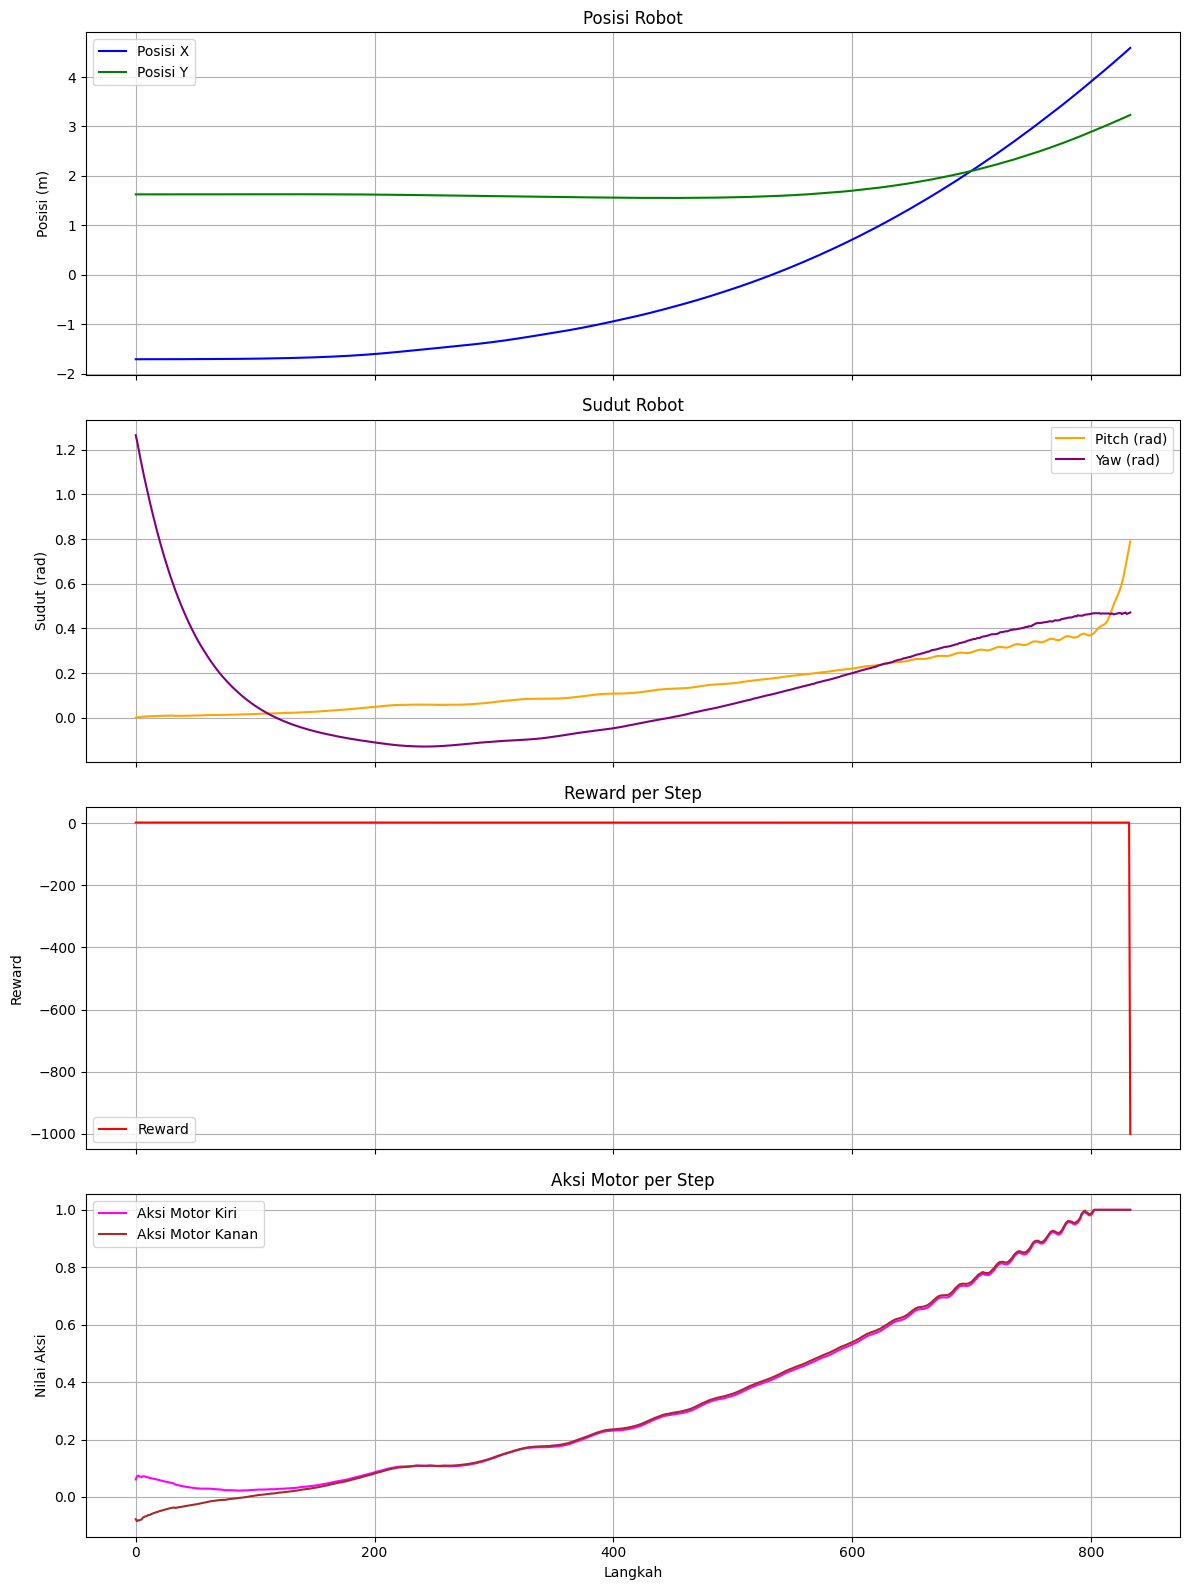

In [2]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from twsbr_env.envs import TwsbrEnv
from stable_baselines3 import PPO

def main():
    # Buat environment dengan target manual dan mode render human
    env = TwsbrEnv(
        render_mode="human",
    )
    
    # Reset environment untuk mendapatkan observasi awal
    obs, info = env.reset()
    
    # Muat model SAC yang sudah dilatih
    model = PPO.load("ppo_twsbr.zip", env=env, device="cuda")
    
    print("Mulai inferensi satu episode. Tekan Ctrl+C untuk menghentikan lebih awal.")
    
    # Data logging untuk plotting
    steps = []
    pos_x_list = []
    pos_y_list = []
    pitch_list = []
    yaw_list = []
    reward_list = []
    left_action_list = []
    right_action_list = []

    step = 0
    done = False
    while True:
        # Dapatkan aksi dari model (deterministic)
        action, _states = model.predict(obs, deterministic=True)
        
        # Lakukan step pada environment
        obs, reward, terminated, truncated, info = env.step(action)
        
        # Ambil data posisi dan sudut dari simulasi (gunakan method internal _get_current_state)
        pos, roll, pitch, yaw = env._get_current_state()  # pos: [x, y, z]
        
        # Simpan data
        steps.append(step)
        pos_x_list.append(pos[0])
        pos_y_list.append(pos[1])
        pitch_list.append(pitch)
        yaw_list.append(yaw)
        reward_list.append(reward)
        left_action_list.append(action[0])
        right_action_list.append(action[1])
        
        env.render()
        
        if terminated or truncated:
            print("Episode selesai.")
            break
        step += 1
    env.close()

    # Plot hasil: posisi, sudut, reward, dan aksi motor
    fig, axs = plt.subplots(4, 1, figsize=(12, 16), sharex=True)
    
    # Grafik posisi: plot x dan y terhadap step
    axs[0].plot(steps, pos_x_list, label="Posisi X", color='blue')
    axs[0].plot(steps, pos_y_list, label="Posisi Y", color='green')
    axs[0].set_ylabel("Posisi (m)")
    axs[0].set_title("Posisi Robot")
    axs[0].legend()
    axs[0].grid(True)
    
    # Grafik sudut: plot pitch dan yaw terhadap step
    axs[1].plot(steps, pitch_list, label="Pitch (rad)", color='orange')
    axs[1].plot(steps, yaw_list, label="Yaw (rad)", color='purple')
    axs[1].set_ylabel("Sudut (rad)")
    axs[1].set_title("Sudut Robot")
    axs[1].legend()
    axs[1].grid(True)
    
    # Grafik reward per step
    axs[2].plot(steps, reward_list, label="Reward", color='red')
    axs[2].set_ylabel("Reward")
    axs[2].set_title("Reward per Step")
    axs[2].legend()
    axs[2].grid(True)
    
    # Grafik aksi motor: left dan right
    axs[3].plot(steps, left_action_list, label="Aksi Motor Kiri", color='magenta')
    axs[3].plot(steps, right_action_list, label="Aksi Motor Kanan", color='brown')
    axs[3].set_ylabel("Nilai Aksi")
    axs[3].set_xlabel("Langkah")
    axs[3].set_title("Aksi Motor per Step")
    axs[3].legend()
    axs[3].grid(True)
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()
